In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Cargar el dataset saltar la fila 1
df = pd.read_csv("../data/raw/deflators_and.csv", skiprows=1)
#verificar su carga
df.head()

,#country+code,#date+start,#date+end,Unnamed: 3,Unnamed: 4,#country+name,#indicator+code,#indicator+name,Unnamed: 8,Unnamed: 9,Unnamed: 10,#date+year,#indicator+type,#indicator+value+num,Unnamed: 14
0,AND,1970-01-01,1970-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1970,1970,SLC,5.181076,E
1,AND,1971-01-01,1971-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1971,1971,SLC,5.587584,E
2,AND,1972-01-01,1972-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1972,1972,SLC,6.063530,E
3,AND,1973-01-01,1973-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1973,1973,SLC,6.782034,E
4,AND,1974-01-01,1974-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1974,1974,SLC,7.863437,E


LIMPIEZA DE DATOS

In [8]:
#Primero cambiaremos los nombre d elas columnas para un mejor entendimiento
df.columns = [
    "country_code", "date_start", "date_end", "unknown_1", "unknown_2", 
    "country_name", "indicator_code", "indicator_name", "unknown_3", 
    "unknown_4", "unknown_5", "year", "indicator_type", "indicator_value", "unknown_6"
]
#verificar cambios
df.head()

,country_code,date_start,date_end,unknown_1,unknown_2,country_name,indicator_code,indicator_name,unknown_3,unknown_4,unknown_5,year,indicator_type,indicator_value,unknown_6
0,AND,1970-01-01,1970-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1970,1970,SLC,5.181076,E
1,AND,1971-01-01,1971-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1971,1971,SLC,5.587584,E
2,AND,1972-01-01,1972-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1972,1972,SLC,6.063530,E
3,AND,1973-01-01,1973-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1973,1973,SLC,6.782034,E
4,AND,1974-01-01,1974-12-31,6,'020,Andorra,22024,GDP Deflator,62250,"Value Standard Local Currency, 2015 prices",1974,1974,SLC,7.863437,E


In [9]:
#Ahora eliminare las columnas innecesarias 
df = df.drop(columns=["unknown_1", "unknown_2", "unknown_3", "unknown_4", "unknown_5", "unknown_6"])
#verificaré cambios
df.head()

,country_code,date_start,date_end,country_name,indicator_code,indicator_name,year,indicator_type,indicator_value
0,AND,1970-01-01,1970-12-31,Andorra,22024,GDP Deflator,1970,SLC,5.181076
1,AND,1971-01-01,1971-12-31,Andorra,22024,GDP Deflator,1971,SLC,5.587584
2,AND,1972-01-01,1972-12-31,Andorra,22024,GDP Deflator,1972,SLC,6.063530
3,AND,1973-01-01,1973-12-31,Andorra,22024,GDP Deflator,1973,SLC,6.782034
4,AND,1974-01-01,1974-12-31,Andorra,22024,GDP Deflator,1974,SLC,7.863437


CONVERSIÓN DE DATOS

In [10]:
# Convertir fechas a tipo datetime
df["date_start"] = pd.to_datetime(df["date_start"])
df["date_end"] = pd.to_datetime(df["date_end"])

# Convertir el año a tipo entero
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

# Convertir el valor del indicador a tipo numérico
df["indicator_value"] = pd.to_numeric(df["indicator_value"], errors="coerce")

In [11]:
#Verificar Valores nulos
print(df.isnull().sum())

country_code       0
date_start         0
date_end           0
country_name       0
indicator_code     0
indicator_name     0
year               0
indicator_type     0
indicator_value    0
dtype: int64


In [12]:
#Como no hay valores nulos procedemos a guardar el archivo limpio y la filtración de datos 
df.to_csv("../data/processed/deflators_and_clean.csv", index=False)

EJERCICIOS
- Calcula el promedio del deflactor del PIB (Value) por década.

- Identifica el año con el valor máximo del deflactor del PIB.

- Haz una gráfica de línea con matplotlib del valor del deflactor a lo largo de los años.

In [13]:
#Calcula el promedio del deflactor del PIB (Value) por década.
Promedio_value=np.mean(df["indicator_value"])
print(f"El promedio del Valor del PIB es: {Promedio_value}")

El promedio del Valor del PIB es: 67.81020679817023


In [14]:
#Identifica el año con el valor máximo del deflactor del PIB.
# Obtener el valor máximo
valor_max_value = np.max(df["indicator_value"])

# Filtrar el dataframe para encontrar la(s) fila(s) donde ocurre ese valor
fila_max = df[df["indicator_value"] == valor_max_value]

# Extraer el año o los años correspondientes
años_maximos = fila_max["year"].values

print(f"El valor máximo del deflactor del PIB es: {valor_max_value}, ocurrido en el año(s): {años_maximos}")

El valor máximo del deflactor del PIB es: 129.5937471985, ocurrido en el año(s): <IntegerArray>
[2008]
Length: 1, dtype: Int64


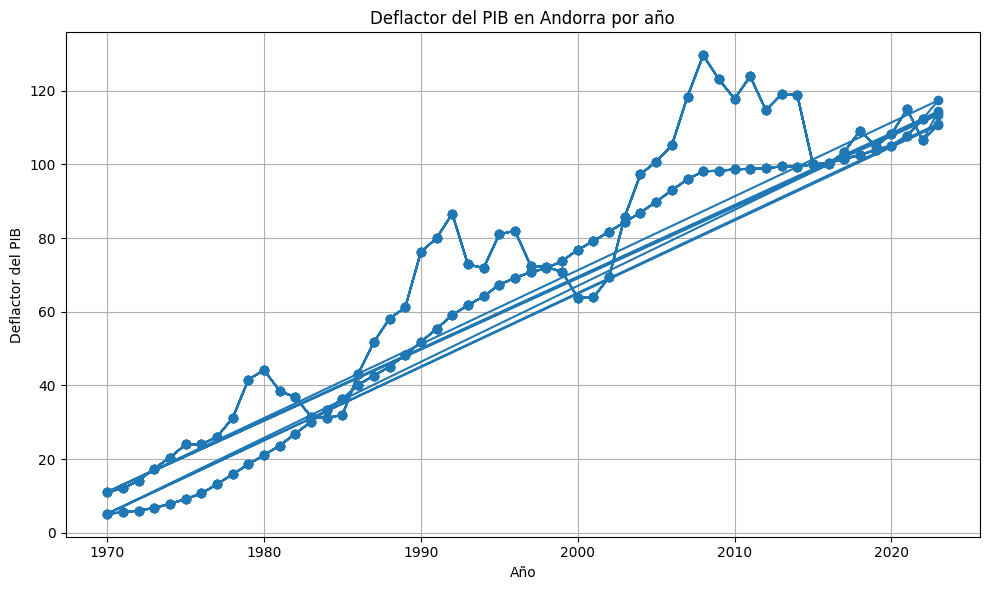

In [15]:
#Haz una gráfica de línea con matplotlib del valor del deflactor a lo largo de los años.
# Cargar el archivo limpio
df = pd.read_csv("../data/processed/deflators_and_clean.csv")

# Filtrar solo los datos de Andorra
df_andorra = df[df["country_code"] == "AND"]

# Asegurar que los tipos sean numéricos
df_andorra["year"] = pd.to_numeric(df_andorra["year"])
df_andorra["indicator_value"] = pd.to_numeric(df_andorra["indicator_value"])

# Establecer el año como índice
df_andorra = df_andorra.set_index("year")

# Seleccionar la columna del deflactor
gdp_deflator = df_andorra["indicator_value"]

# Graficar la evolución del GDP Deflator
plt.figure(figsize=(10, 6))
plt.plot(gdp_deflator.index, gdp_deflator.values, marker='o', linestyle='-')
plt.title('Deflactor del PIB en Andorra por año')
plt.xlabel('Año')
plt.ylabel('Deflactor del PIB')
plt.grid(True)
plt.tight_layout()
plt.show()